In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [2]:
from  sklearn.model_selection import train_test_split

In [3]:
path=r"/Users/nicolo/Desktop/Uni_project/pid-5M.csv"

In [4]:
data=pd.read_csv(path)

In [5]:
data

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...,...
4999995,211,0.835889,0.495847,0.975812,0,0.000000,0.046967
4999996,211,2.027470,0.287966,1.222890,0,0.197894,0.186404
4999997,211,0.827497,0.689746,0.980957,0,0.000000,0.000000
4999998,2212,1.331200,0.382746,0.811818,0,0.036942,0.056947


In [6]:
data.describe()

,id,p,theta,beta,nphe,ein,eout
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,9.941839e+02,1.230053e+00,4.889321e-01,8.995796e-01,3.575243e+00,5.635883e-02,7.033195e-02
std,9.724034e+02,7.414895e-01,2.942161e-01,1.132321e-01,1.779236e+01,7.882675e-02,1.020604e-01
min,-1.100000e+01,2.101170e-01,9.222140e-02,5.500010e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.110000e+02,6.657510e-01,2.817420e-01,8.378760e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.110000e+02,1.066150e+00,4.048670e-01,9.461940e-01,0.000000e+00,3.442440e-02,4.417490e-02
75%,2.212000e+03,1.649650e+00,6.117800e-01,9.855910e-01,0.000000e+00,6.834520e-02,9.365990e-02
max,2.212000e+03,5.286950e+00,2.219270e+00,1.499590e+00,3.490000e+02,8.993820e-01,1.097410e+00


In [7]:
data.shape

(5000000, 7)

In [8]:
np.unique(data.id,return_counts = True)

(array([ -11,  211,  321, 2212]), array([  14847, 2806833,  232471, 1945849]))

In [9]:
data.isnull().sum()

id       0
p        0
theta    0
beta     0
nphe     0
ein      0
eout     0
dtype: int64

In [10]:
data=data.head(50000)
data

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...,...
49995,211,1.205000,0.372458,0.988503,0,0.029572,0.049577
49996,2212,0.899519,0.685490,0.701149,0,0.000000,0.000000
49997,211,2.112610,0.177894,0.996632,0,0.027283,0.041749
49998,211,0.913405,0.454171,1.000300,0,0.026596,0.000000


In [11]:
df=data.drop(['id'],axis=1)

In [12]:
df

,p,theta,beta,nphe,ein,eout
0,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...
49995,1.205000,0.372458,0.988503,0,0.029572,0.049577
49996,0.899519,0.685490,0.701149,0,0.000000,0.000000
49997,2.112610,0.177894,0.996632,0,0.027283,0.041749
49998,0.913405,0.454171,1.000300,0,0.026596,0.000000


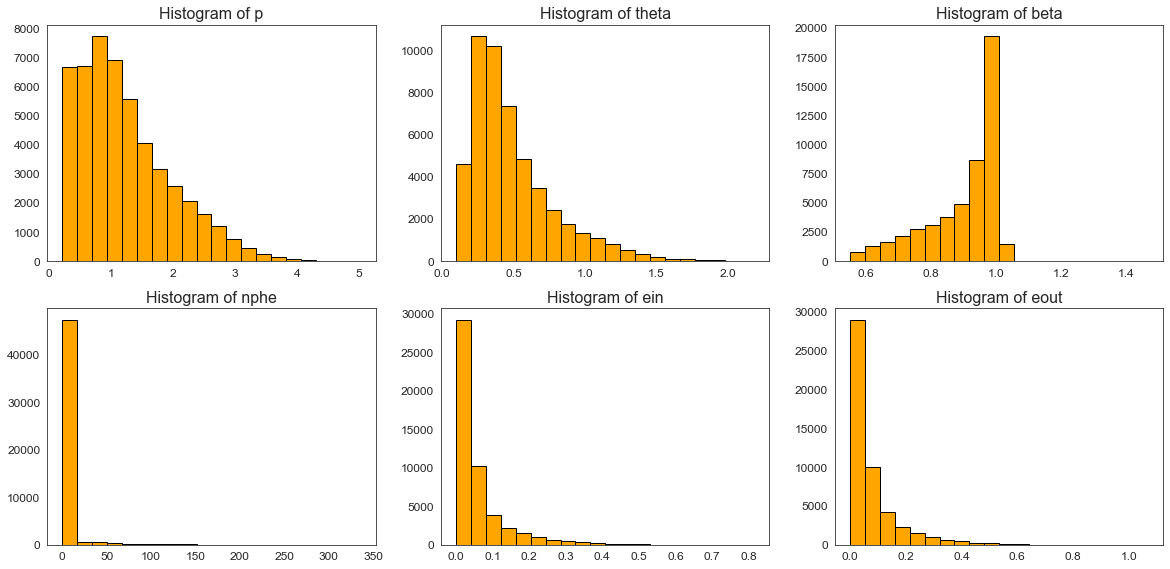

In [13]:
i=1
plt.figure(figsize=(20,20))
for c in df.describe().columns[:]:
    plt.subplot(4,3,i)
    plt.title(f"Histogram of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df[c],bins=20,color='orange',edgecolor='k')
    i+=1
plt.show()

In [14]:
df.corr()

,p,theta,beta,nphe,ein,eout
p,1.000000,-0.568493,0.226909,-0.077316,0.411169,0.540990
theta,-0.568493,1.000000,0.025083,0.042375,-0.371328,-0.383449
beta,0.226909,0.025083,1.000000,0.016810,-0.011650,0.113740
nphe,-0.077316,0.042375,0.016810,1.000000,-0.019449,-0.037076
ein,0.411169,-0.371328,-0.011650,-0.019449,1.000000,0.284963
eout,0.540990,-0.383449,0.113740,-0.037076,0.284963,1.000000


<AxesSubplot:>

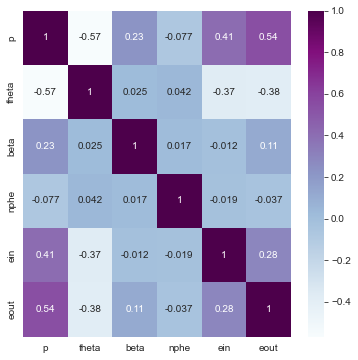

In [15]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap="BuPu")

In [16]:
labels_names = ['Positron',"Pion","Kaon","Proton"]
id_names = np.unique(data['id'])

In [17]:
keys = [-11,211,321,2212] # particle identifiers to assign Label name in the sample
sample = data.copy()
sample['Label'] = sample['id'].apply(lambda itype: labels_names[keys.index(itype)]) # Map the ids in data set to its label name
sample = sample.drop(['id'],axis=1) # Remove the id column (not needed now we have the label names)
frames = []
# First 100 observations per each hadron
for t in labels_names:
    # Create Boolean Mask to select hadron
    mask = sample['Label'] == t
    frames.append(sample[mask].head(100))
# Concatenate the frames
sample = pd.concat(frames)
sample.groupby('Label')['Label'].count() # Count how many instances there are of each particle (should be 100 each)

Label
Kaon        100
Pion        100
Positron    100
Proton      100
Name: Label, dtype: int64

In [18]:
sample

,p,theta,beta,nphe,ein,eout,Label
143,0.965438,0.175186,0.999518,16,0.226139,0.000000,Positron
279,1.430840,0.266338,1.000610,53,0.260426,0.056901,Positron
1374,0.315557,0.222151,0.997282,0,0.000000,0.000000,Positron
1916,0.885481,0.782970,1.001940,0,0.000000,0.000000,Positron
1964,0.698711,0.329893,0.996576,39,0.120439,0.000000,Positron
...,...,...,...,...,...,...,...
236,0.953841,0.894638,0.717442,0,0.000000,0.000000,Proton
242,1.006330,0.588206,0.728056,0,0.047150,0.118242,Proton
243,0.836194,0.479223,0.676629,0,0.059419,0.038224,Proton
246,2.166630,0.302290,0.907348,0,0.030304,0.060563,Proton


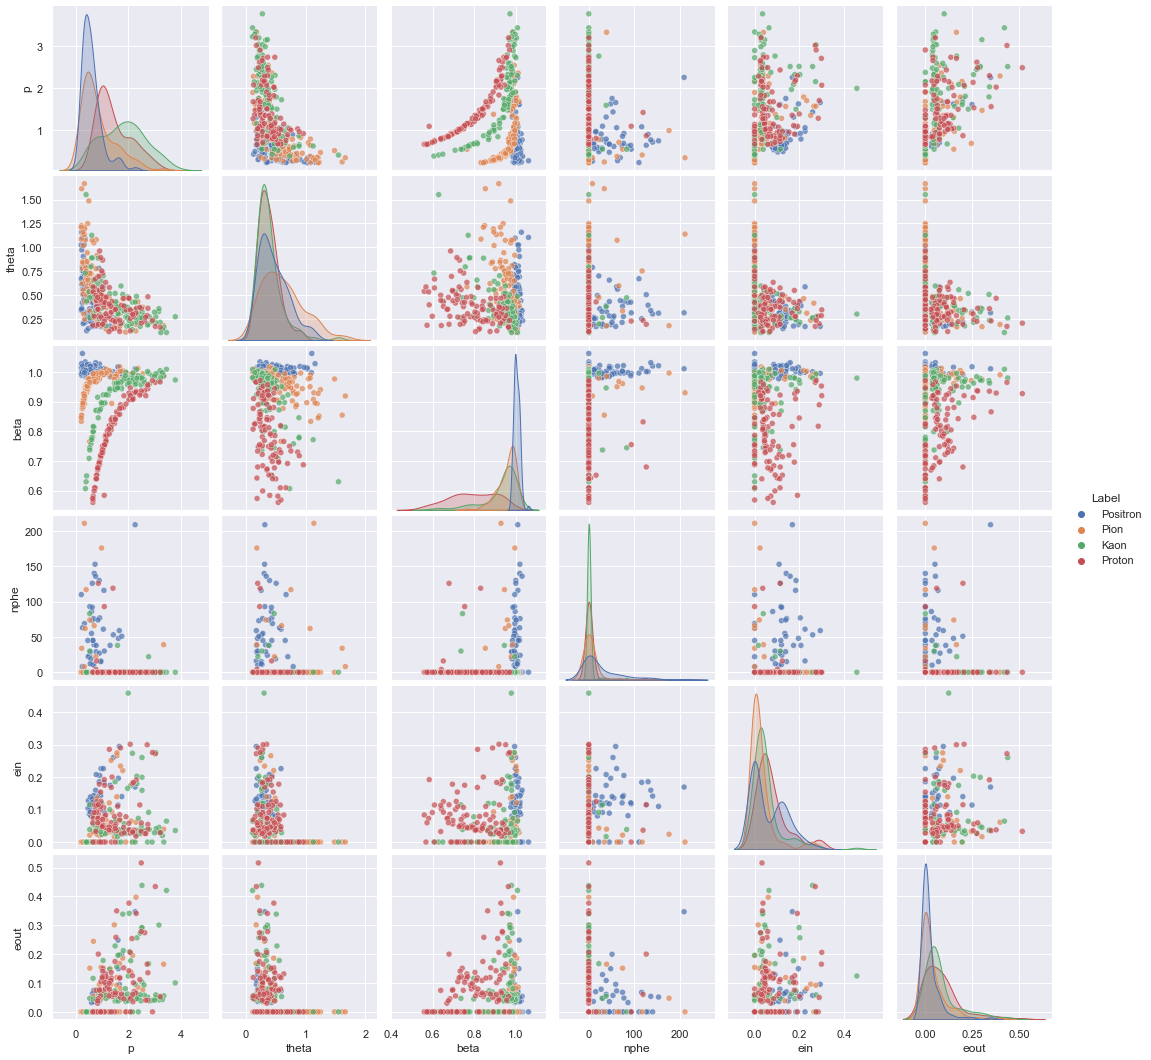

In [19]:
sns.set(style="darkgrid", color_codes=True)  #style must be one of white, dark, whitegrid, darkgrid, ticks
#QUESTO COMANDO CAMBIA LO STILE DI TUTTI I PLOT, ANCHE QUELLI FATTI CON 'plt.plot'
sns.pairplot(sample, hue = 'Label',plot_kws={'alpha':0.7}) # Creates correlation plot sorted by Label
# Reduced alpha to improve plot visability

In [20]:
data

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...,...
49995,211,1.205000,0.372458,0.988503,0,0.029572,0.049577
49996,2212,0.899519,0.685490,0.701149,0,0.000000,0.000000
49997,211,2.112610,0.177894,0.996632,0,0.027283,0.041749
49998,211,0.913405,0.454171,1.000300,0,0.026596,0.000000


In [21]:
df

,p,theta,beta,nphe,ein,eout
0,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...
49995,1.205000,0.372458,0.988503,0,0.029572,0.049577
49996,0.899519,0.685490,0.701149,0,0.000000,0.000000
49997,2.112610,0.177894,0.996632,0,0.027283,0.041749
49998,0.913405,0.454171,1.000300,0,0.026596,0.000000


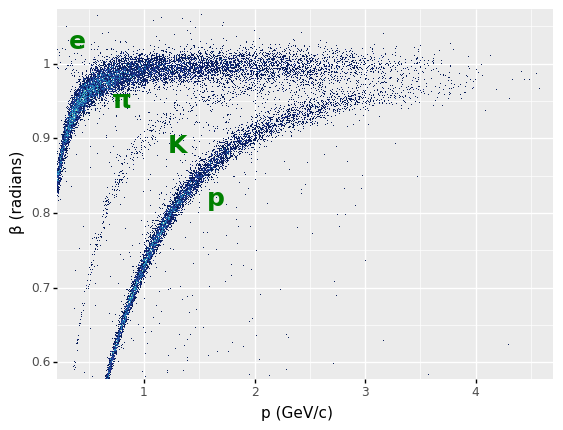

<ggplot: (8761228868226)>

In [22]:
from plotnine import *
#ok now it works. I have installed plotnine after have upgraded some pakages(numpy, tensorflow, bekeh,streamlit)
#ggplot is a pakage of plotnine as the others, that's wy I have imported all of them with'*'
density_plot = ggplot(data=data) \
             + geom_bin2d(aes(x='p', y='beta'), bins=1000, show_legend=False) \
             + scale_fill_continuous("YlGnBu_r") \
             + labs(x='p (GeV/c)', y='β (radians)', color='black') \
             + coord_cartesian(ylim=(0.6, 1.05), xlim=(0.42, 4.5)) \
             + annotate("text", x = 0.4, y = 1.03, label = "e", color='green', size = 18, fontweight="bold") \
             + annotate("text", x = 0.8, y = 0.95, label = "π", color='green', size = 18, fontweight="bold") \
             + annotate("text", x = 1.3, y = 0.89, label = "K", color='green', size = 18, fontweight="bold") \
             + annotate("text", x = 1.65, y = 0.82, label = "p", color='green', size = 18, fontweight="bold") 
density_plot

In [23]:
y=data.id
y.unique()

array([ 211, 2212,  321,  -11])

In [24]:
for i in range(0,50000):
    if y[i]==211:
       y[i]=0
    else:
       y[i]=1



/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_1529/2132762452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_1529/2132762452.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [25]:
y.unique()

array([0, 1])

In [26]:
y

0        0
1        0
2        1
3        0
4        1
        ..
49995    0
49996    1
49997    0
49998    0
49999    0
Name: id, Length: 50000, dtype: int64

In [27]:
np.unique(y,return_counts = True)

(array([0, 1]), array([27974, 22026]))

In [28]:
dt=pd.concat((df,y),axis=1)

In [29]:
dt

,p,theta,beta,nphe,ein,eout,id
0,0.780041,1.081480,0.989962,0,0.000000,0.000000,0
1,0.260929,0.778892,0.902450,0,0.000000,0.000000,0
2,0.773022,0.185953,0.642428,4,0.101900,0.000000,1
3,0.476997,0.445561,0.951471,0,0.000000,0.000000,0
4,2.123290,0.337332,0.908652,0,0.034379,0.049256,1
...,...,...,...,...,...,...,...
49995,1.205000,0.372458,0.988503,0,0.029572,0.049577,0
49996,0.899519,0.685490,0.701149,0,0.000000,0.000000,1
49997,2.112610,0.177894,0.996632,0,0.027283,0.041749,0
49998,0.913405,0.454171,1.000300,0,0.026596,0.000000,0


In [30]:
df_0 = dt[dt.id == abs(0)]

In [31]:
df_0

,p,theta,beta,nphe,ein,eout,id
0,0.780041,1.081480,0.989962,0,0.000000,0.000000,0
1,0.260929,0.778892,0.902450,0,0.000000,0.000000,0
3,0.476997,0.445561,0.951471,0,0.000000,0.000000,0
5,0.403296,0.694215,0.958553,0,0.000000,0.000000,0
10,0.612497,0.809353,0.982344,0,0.000000,0.000000,0
...,...,...,...,...,...,...,...
49994,1.059890,0.316029,1.004300,0,0.032639,0.052415,0
49995,1.205000,0.372458,0.988503,0,0.029572,0.049577,0
49997,2.112610,0.177894,0.996632,0,0.027283,0.041749,0
49998,0.913405,0.454171,1.000300,0,0.026596,0.000000,0


In [32]:
df_1=dt[dt.id==abs(1)]
df_1

,p,theta,beta,nphe,ein,eout,id
2,0.773022,0.185953,0.642428,4,0.101900,0.000000,1
4,2.123290,0.337332,0.908652,0,0.034379,0.049256,1
6,1.382620,0.436689,0.844835,0,0.200275,0.053651,1
7,1.133130,0.276831,0.781295,0,0.044038,0.093980,1
8,0.656291,0.542507,0.560291,0,0.083406,0.000000,1
...,...,...,...,...,...,...,...
49988,0.599832,0.525916,0.770316,0,0.000000,0.000000,1
49989,1.421840,0.456268,0.831724,0,0.028061,0.225727,1
49990,1.643850,0.332099,0.885782,0,0.146212,0.044724,1
49993,1.361720,0.351195,0.816579,0,0.043763,0.068574,1


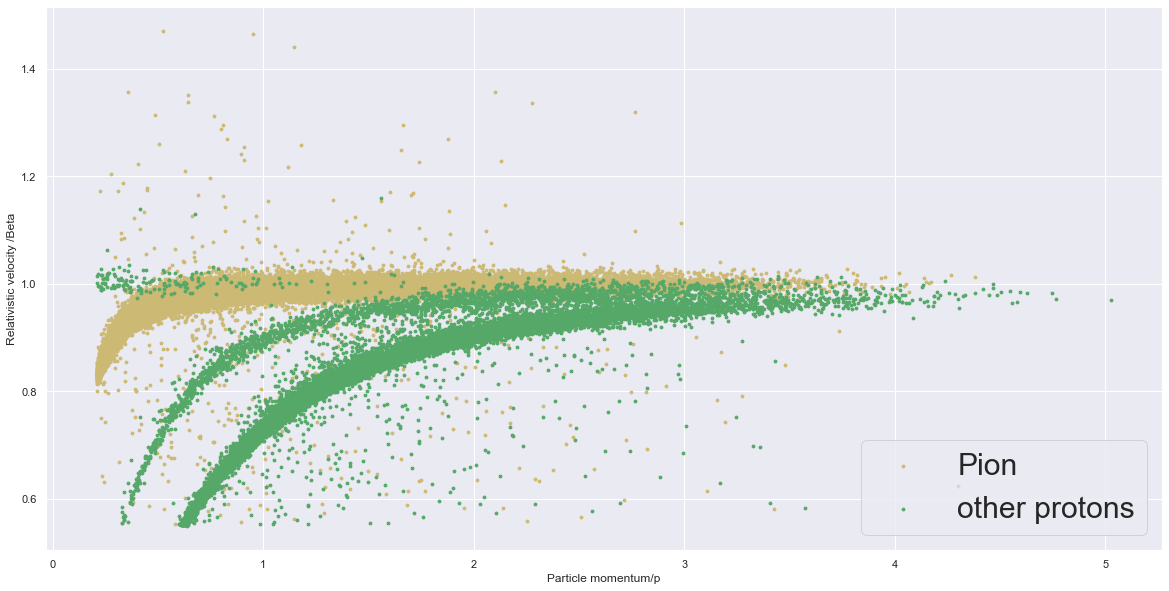

In [33]:
plt.subplots(figsize=(20,10))
plt.scatter(df_0.p,df_0.beta,color='y',s=8,label='Pion')
plt.scatter(df_1.p,df_1.beta,color='g',s=8,label='other protons')
plt.xlabel('Particle momentum/p')
plt.ylabel('Relativistic velocity /Beta')
plt.legend(loc="lower right", fontsize=30)



In [34]:
dt

,p,theta,beta,nphe,ein,eout,id
0,0.780041,1.081480,0.989962,0,0.000000,0.000000,0
1,0.260929,0.778892,0.902450,0,0.000000,0.000000,0
2,0.773022,0.185953,0.642428,4,0.101900,0.000000,1
3,0.476997,0.445561,0.951471,0,0.000000,0.000000,0
4,2.123290,0.337332,0.908652,0,0.034379,0.049256,1
...,...,...,...,...,...,...,...
49995,1.205000,0.372458,0.988503,0,0.029572,0.049577,0
49996,0.899519,0.685490,0.701149,0,0.000000,0.000000,1
49997,2.112610,0.177894,0.996632,0,0.027283,0.041749,0
49998,0.913405,0.454171,1.000300,0,0.026596,0.000000,0


In [35]:
y=dt.id
x=dt.drop('id',axis=1)

In [36]:
x

,p,theta,beta,nphe,ein,eout
0,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...
49995,1.205000,0.372458,0.988503,0,0.029572,0.049577
49996,0.899519,0.685490,0.701149,0,0.000000,0.000000
49997,2.112610,0.177894,0.996632,0,0.027283,0.041749
49998,0.913405,0.454171,1.000300,0,0.026596,0.000000
